In [5]:
import numpy as np
import matplotlib.pyplot as plt

(100, 2)
[[92 26]
 [ 0 61]
 [18 48]
 [20 55]
 [45  1]
 [68 33]
 [20  2]
 [ 8 45]
 [39  7]
 [94 26]
 [84 11]
 [45 94]
 [20 28]
 [36 83]
 [33 54]
 [75 44]
 [96 21]
 [ 9 50]
 [45  3]
 [30 73]
 [63 42]
 [39 99]
 [90 83]
 [85 53]
 [23 11]
 [75 93]
 [11 11]
 [ 1 32]
 [67 85]
 [67 53]
 [60 27]
 [61  7]
 [85 90]
 [43 17]
 [95 66]
 [70 11]
 [71 90]
 [86  7]
 [18 82]
 [20  1]
 [14 75]
 [ 7 49]
 [12 25]
 [ 6 64]
 [48 30]
 [94 45]
 [57  8]
 [83 78]
 [74 99]
 [41  1]
 [67 27]
 [69 66]
 [91 73]
 [68 94]
 [32 62]
 [50 48]
 [18 62]
 [ 6 39]
 [46 68]
 [30 26]
 [91  6]
 [ 7 32]
 [89 72]
 [48 13]
 [46 30]
 [25 18]
 [33 87]
 [14 60]
 [63 62]
 [86 38]
 [25 66]
 [67 30]
 [24 16]
 [57  7]
 [50 31]
 [77 13]
 [43 71]
 [50 70]
 [39  6]
 [29 70]
 [33 66]
 [11 31]
 [65 87]
 [ 8 69]
 [68 69]
 [49 59]
 [ 5 43]
 [91 71]
 [11 55]
 [80 33]
 [28 75]
 [49 76]
 [78 60]
 [ 9 49]
 [99 32]
 [86 11]
 [19 50]
 [16 24]
 [82 65]
 [46 18]]


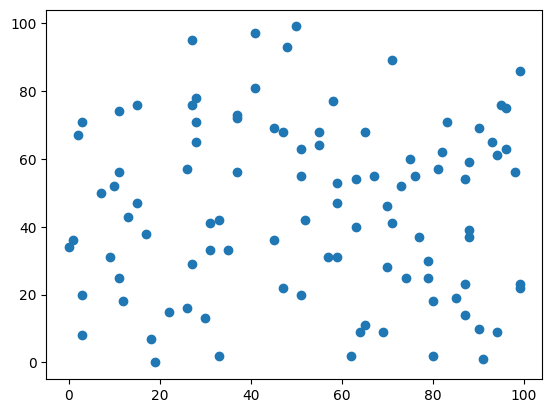

In [14]:
m = 100 # number of samples

input = np.random.randint(0, 100, (m, 2))
print(input.shape)
print(input)

plt.scatter(x, y)
plt.show()

In [53]:
label = np.zeros((m, 1), dtype=int)  # initialize labels as a 2D array with shape (m,1)
for i in range(m):
    if input[i][0] + input[i][1] > 100:
        label[i] = 1

print(label.shape)
print(label)

(100, 1)
[[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]


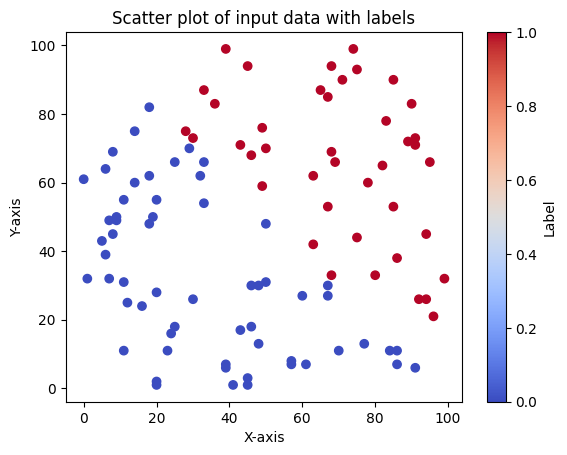

In [27]:
# visualizing the data; if label is 1, color it red, else color it blue
x = input[:, 0]
y = input[:, 1]
plt.scatter(x, y, c=label[:, 0], cmap='coolwarm')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot of input data with labels')
plt.colorbar(label='Label')
plt.show()


In [43]:
X = input.transpose()
wt = np.random.rand(2, 1)  # initialize weights randomly
b = np.random.rand()
print(X.shape, wt.shape)
print(X, wt, b)

(2, 100) (2, 1)
[[92  0 18 20 45 68 20  8 39 94 84 45 20 36 33 75 96  9 45 30 63 39 90 85
  23 75 11  1 67 67 60 61 85 43 95 70 71 86 18 20 14  7 12  6 48 94 57 83
  74 41 67 69 91 68 32 50 18  6 46 30 91  7 89 48 46 25 33 14 63 86 25 67
  24 57 50 77 43 50 39 29 33 11 65  8 68 49  5 91 11 80 28 49 78  9 99 86
  19 16 82 46]
 [26 61 48 55  1 33  2 45  7 26 11 94 28 83 54 44 21 50  3 73 42 99 83 53
  11 93 11 32 85 53 27  7 90 17 66 11 90  7 82  1 75 49 25 64 30 45  8 78
  99  1 27 66 73 94 62 48 62 39 68 26  6 32 72 13 30 18 87 60 62 38 66 30
  16  7 31 13 71 70  6 70 66 31 87 69 69 59 43 71 55 33 75 76 60 49 32 11
  50 24 65 18]] [[0.71298022]
 [0.40727811]] 0.8962888278294


In [45]:
Z = np.dot(wt.T, X) + b  # calculate the weighted sum
A = 1 / (1 + np.exp(-Z))  # apply sigmoid activation function

In [59]:
def forward():
    Z = np.dot(wt.T, X) + b
    A = 1 / (1 + np.exp(-Z))
    return A

def backward():
    diff = A.T - label  # A.T has shape (m, 1) matching label's shape (m, 1)
    dw = np.dot(X, diff) / m  # X has shape (2, m), diff has shape (m, 1) so dw becomes (2,1)
    db = np.sum(diff) / m
    return dw, db

def update(wt, b, dw, db, learning_rate):
    wt -= learning_rate * dw
    b -= learning_rate * db
    return wt, b

dw, db = np.zeros(wt.shape), 0  # initialize gradients
epsilon = 1e-10  # small value to avoid log(0)


# Gradient Descent
learning_rate = 0.01
for i in range(1000):  # number of iterations
    A = forward()
    dw, db = backward()
    wt, b = update(wt, b, dw, db, learning_rate)
    if i % 1 == 0:  # print cost every iteration
        J = np.mean(- (label * np.log(A + epsilon) + (1 - label) * np.log(1 - A + epsilon)))
        print(f"Iteration {i}, Cost: {J}")

Iteration 0, Cost: 1.3193872202216448
Iteration 1, Cost: 10.38555623780893
Iteration 2, Cost: 2.048330880782306
Iteration 3, Cost: 4.564625074553199
Iteration 4, Cost: 8.440913343213571
Iteration 5, Cost: 1.3132271731060183
Iteration 6, Cost: 10.380553191877052
Iteration 7, Cost: 2.0401036884277075
Iteration 8, Cost: 4.557242186107705
Iteration 9, Cost: 8.44769146432022
Iteration 10, Cost: 1.306549353424679
Iteration 11, Cost: 10.375004499200417
Iteration 12, Cost: 2.030749699275518
Iteration 13, Cost: 4.549082809707076
Iteration 14, Cost: 8.455220827378671
Iteration 15, Cost: 1.2992092165286033
Iteration 16, Cost: 10.368749202246653
Iteration 17, Cost: 2.0199419685750652
Iteration 18, Cost: 4.539895841139767
Iteration 19, Cost: 8.463744140404623
Iteration 20, Cost: 1.2909937750133758
Iteration 21, Cost: 10.361542669064981
Iteration 22, Cost: 2.00718645873389
Iteration 23, Cost: 4.529291227053386
Iteration 24, Cost: 8.473637818249445
Iteration 25, Cost: 1.2815731602891494
Iteration 26,